# Data

In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

mnist = tf.keras.datasets.mnist  #images hand-written digits from 0 to 9 "28x28"

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy', 
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2587 - accuracy: 0.9235
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1081 - accuracy: 0.9672
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0724 - accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0536 - accuracy: 0.9828
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0431 - accuracy: 0.9860
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0306 - accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0268 - accuracy: 0.9907
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0211 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0179 - accuracy: 0.9940
Epoch 10/10
1875/1875 [=========

# Visualize Examples

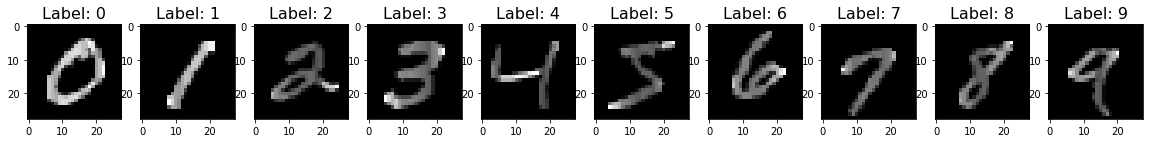

In [2]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title("Label: {}".format(i), fontsize=16)

In [3]:
for i in range(10):
    print(y_train[i])

5
0
4
1
9
2
1
3
1
4


# Evaluate Loss and Accuracy

In [4]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss, test_acc)

313/313 [==============================] - 0s 966us/step - loss: 0.1103 - accuracy: 0.9757
0.11032623052597046 0.9757000207901001


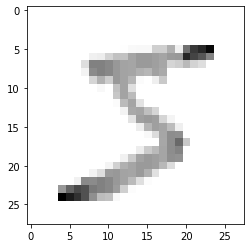

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [5]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

print (x_train[0])

# Visualize Example Maping

In [6]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
for i in range(10):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [8]:
model.save('MNIST_DATASET_PREDICTION')

INFO:tensorflow:Assets written to: MNIST_DATASET_PREDICTION\assets


In [9]:
new_model = tf.keras.models.load_model('MNIST_DATASET_PREDICTION')

# Train and Testing

In [10]:
y_predictions = new_model.predict([x_test])
y_predictions_classes = np.argmax(y_predictions, axis = 1)

313/313 [==============================] - 0s 918us/step


In [11]:
print(y_predictions)
print(y_predictions_classes)

[[4.1930920e-13 1.3719379e-09 1.3653563e-10 ... 1.0000000e+00
  4.0197054e-15 9.6626074e-10]
 [4.6160682e-18 2.8694346e-08 1.0000000e+00 ... 8.1297561e-16
  4.0956388e-13 5.7272948e-22]
 [2.1444504e-14 9.9999678e-01 3.8876435e-09 ... 5.8829170e-07
  2.5176980e-06 2.1088871e-09]
 ...
 [3.0430811e-14 5.6886312e-10 4.0537056e-13 ... 1.2272372e-09
  1.0114487e-08 2.9250807e-06]
 [1.8263489e-17 1.1209756e-14 4.3324875e-17 ... 3.8093765e-15
  5.4558827e-06 5.8499732e-20]
 [4.6559453e-19 5.0488768e-18 2.6550176e-16 ... 2.5057612e-26
  3.8315390e-13 5.0458126e-19]]
[7 2 1 ... 4 5 6]


In [12]:
import numpy as np

print(np.argmax(y_predictions[0]))

7


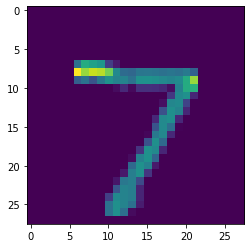

In [13]:
plt.imshow(x_test[0])
plt.show()

# Evaluate Prediction

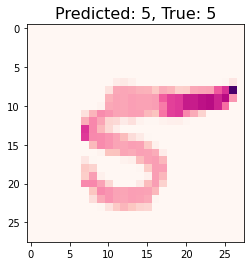

In [26]:
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_predictions_class = y_predictions_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_predictions_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='RdPu')

# Confusion Matrix

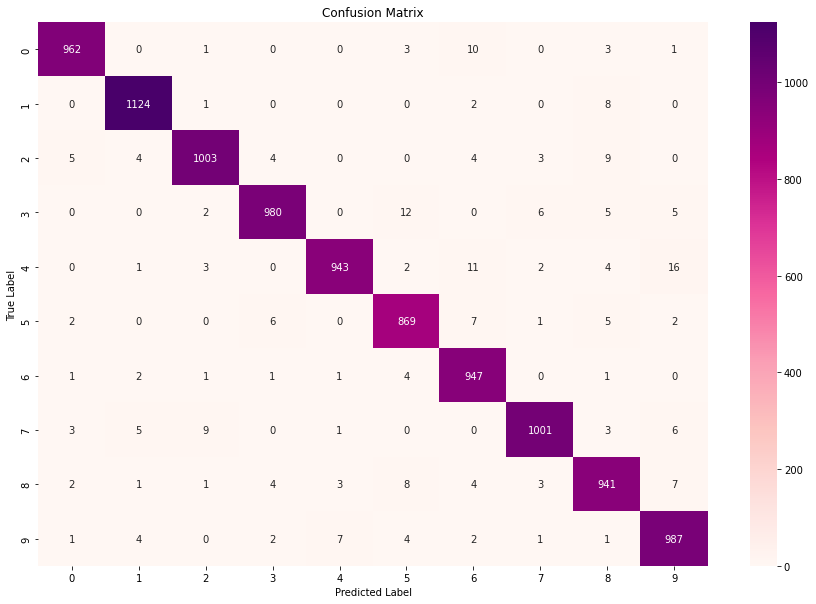

In [15]:
confusion_mtx = confusion_matrix(y_true, y_predictions_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="RdPu")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

# Investigate  Errors

In [16]:
errors = (y_predictions_classes - y_true != 0)
y_predictions_classes_errors = y_predictions_classes[errors]
y_predictions_errors = y_predictions[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [17]:
y_predictions_errors_probability = np.max(y_predictions_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_predictions_errors, y_true_errors, axis=1))
diff_errors_predictions_true = y_predictions_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_predictions_true)
top_idx_diff_errors = sorted_idx_diff_errors[-3:] # 3 last ones

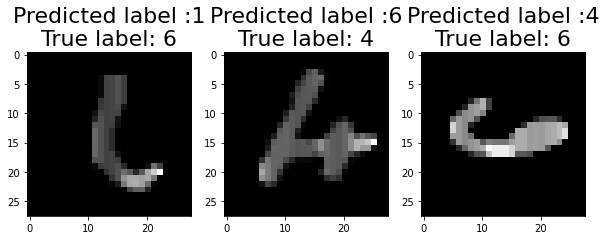

In [18]:
# Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(10,10))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_predictions_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)